In [48]:
from keras.preprocessing import image
from keras.layers import *
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.applications.mobilenet_v2 import MobileNetV2
import os

In [49]:
sample_image = image.load_img('Train/Fearow/2106a9a26a114d9692ec51bb57b1c483.jpg')

In [50]:
type(sample_image)

PIL.JpegImagePlugin.JpegImageFile

In [51]:
arr_img = image.img_to_array(sample_image)/255

In [52]:
arr_img.shape

(537, 620, 3)

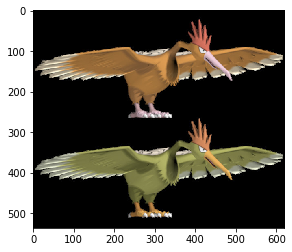

In [53]:
plt.imshow(arr_img)

In [54]:
train_gen = image.ImageDataGenerator(rescale=1/255.0,
                               rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.3,
                              horizontal_flip=True)
test_gen = image.ImageDataGenerator(rescale=1/255.0)           

In [55]:
train_img_gen = train_gen.flow_from_directory("Train/",
                                        target_size=((224,224)),
                                        class_mode='categorical',
                                       batch_size=256)

Found 1645 images belonging to 10 classes.


In [56]:
class_ids = train_img_gen.class_indices

In [57]:
folders = os.listdir('Train')

In [62]:
for f in folders:
    path = os.path.join("Train",f)
    print(f + " " + str(len(os.listdir(path))))

Pikachu 268
Meowth 63
Fearow 111
Dratini 98
Squirtle 248
Aerodactyl 81
Spearow 117
Psyduck 143
Bulbasaur 255
Charmander 264


In [38]:
base_model = MobileNetV2(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [39]:
gap = GlobalAveragePooling2D()(base_model.output)
fc1 = Dense(256,activation='relu')(gap)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(10,activation='softmax')(d1)

In [41]:
main_model = Model(inputs = base_model.input,outputs = fc2)

In [46]:
adam = Adam(learning_rate=0.00003)

In [47]:
main_model.compile(optimizer=adam,loss = 'categorical_crossentropy',metrics=['accuracy'])

In [63]:
hist = main_model.fit_generator(train_gen,epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.


ValueError: Failed to find data adapter that can handle input: <class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>, <class 'NoneType'>